In [1]:
from sklearn.model_selection import train_test_split
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd gdrive/My\ Drive/fakenews/

/content/gdrive/My Drive/fakenews


In [3]:
fake=pd.read_csv('Fake.csv')
true=pd.read_csv('True.csv')

In [4]:
fake.head()

title  ...               date
0   Donald Trump Sends Out Embarrassing New Year’...  ...  December 31, 2017
1   Drunk Bragging Trump Staffer Started Russian ...  ...  December 31, 2017
2   Sheriff David Clarke Becomes An Internet Joke...  ...  December 30, 2017
3   Trump Is So Obsessed He Even Has Obama’s Name...  ...  December 29, 2017
4   Pope Francis Just Called Out Donald Trump Dur...  ...  December 25, 2017

[5 rows x 4 columns]

In [5]:
#assigning labels for fake and true data - fake=1, true=0
fake['label']=1
true['label']=0

In [6]:
fake.head()

title  ... label
0   Donald Trump Sends Out Embarrassing New Year’...  ...     1
1   Drunk Bragging Trump Staffer Started Russian ...  ...     1
2   Sheriff David Clarke Becomes An Internet Joke...  ...     1
3   Trump Is So Obsessed He Even Has Obama’s Name...  ...     1
4   Pope Francis Just Called Out Donald Trump Dur...  ...     1

[5 rows x 5 columns]

In [7]:
true.head()

title  ... label
0  As U.S. budget fight looms, Republicans flip t...  ...     0
1  U.S. military to accept transgender recruits o...  ...     0
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...     0
3  FBI Russia probe helped by Australian diplomat...  ...     0
4  Trump wants Postal Service to charge 'much mor...  ...     0

[5 rows x 5 columns]

In [8]:
#joining both datasets into one
news_df=pd.concat([fake, true], axis=0, ignore_index=True)

In [9]:
news_df.sample(10)

title  ... label
17625  WATCH: JOY BEHAR of “THE VIEW” Calls Bill Clin...  ...     1
1454    Trump Says He Gave Classified Info To Russia ...  ...     1
12180  HOW MANY DIFFERENT Ways Can Arrogant Liberals ...  ...     1
16147  DID OBAMA ROB FANNIE & FREDDIE OF BILLIONS? Dr...  ...     1
10330  NEW WH COMMUNICATIONS DIRECTOR: I’ll Bring CNN...  ...     1
687     Chelsea Clinton Teaches Trump How To Treat Th...  ...     1
44556  UK looking at all measures to pressure North K...  ...     0
19986  KID ROCK UNLOADS On Colin Kaepernick At Packed...  ...     1
18751  DON’T TAKE YOUR KIDS TO New Orleans To Learn A...  ...     1
25188  California lawmakers take anti-Trump stance as...  ...     0

[10 rows x 5 columns]

In [10]:
#assigning variables
X=news_df['text']
y=news_df['label']

# Cleaning data

In [11]:
#removing special characters and turning text into lowercase
def remove_special_characters(text):
    pattern = r'[^a-zA-Z]'
    text = re.sub(pattern, ' ', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    return text.lower()

X=X.apply(remove_special_characters)

In [12]:
#stopwords removal
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

def remove_stopwords(text):
  return ' '.join([word for word in text.split() if word not in stop])

X=X.apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
#stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()

def text_stemming(text):
  return ' '.join(stemmer.stem(word) for word in text.split())

X=X.apply(text_stemming)

# Data visualization

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#WordCloud from most common words in train dataset
all_words = ' '.join([text for text in news_df['text']])

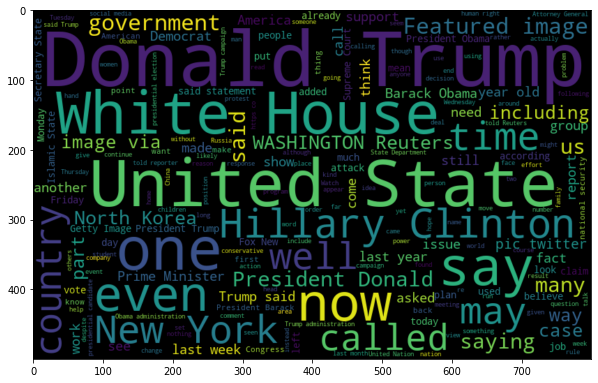

In [15]:
wordcloud=WordCloud(width=800, height=500, random_state=2, max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [16]:
#wordcloud for most common words in texts labelled as fake
fake_news=' '.join([text for text in news_df['text'][news_df['label']==1]])

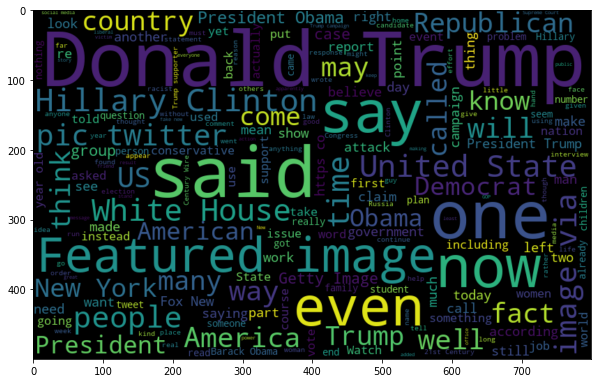

In [17]:
wordcloud=WordCloud(width=800, height=500, random_state=2, max_font_size=110).generate(fake_news)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [18]:
#wordcloud for most common words in texts labelled as true
true_news=' '.join([text for text in news_df['text'][news_df['label']==0]])

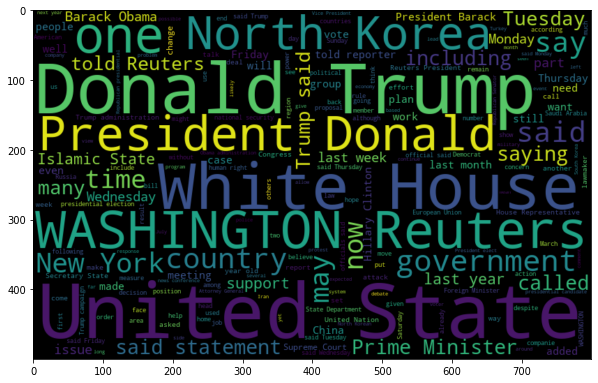

In [19]:
wordcloud=WordCloud(width=800, height=500, random_state=2, max_font_size=110).generate(true_news)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

# Logistic Regression model

In [20]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=2, test_size=0.2, stratify=y, shuffle=True)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf_train=tfidf.fit_transform(X_train)
tfidf_test=tfidf.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(tfidf_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
logreg.score(tfidf_test, y_test)

0.987750556792873

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'C': np.arange(4.5,7, 0.1)
}
grid=GridSearchCV(LogisticRegression(), param_grid=param_grid, cv=3)
grid.fit(tfidf_train,y_train)

In [25]:
print('Best Parameters : ',grid.best_params_)
print('Best score Through Grid Search : %.3f'%grid.best_score_)

Best Parameters :  {'C': 6.799999999999992}
Best score Through Grid Search : 0.990


In [26]:
logreg2=LogisticRegression(C=6.799999999999992)
logreg2.fit(tfidf_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=6.799999999999992, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
y_pred1=logreg2.predict(tfidf_test)

In [29]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4284
           1       0.99      0.99      0.99      4696

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



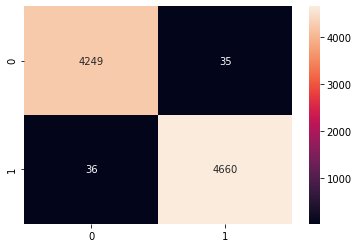

In [30]:
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, fmt='d')

# Classification using Keras

In [ ]:
from keras.layers import Embedding, Dense, LSTM, Dropout, Flatten
from keras.models import Sequential
from keras import preprocessing
from keras.preprocessing import text,sequence

In [ ]:
max_features = 10000
maxlen=300

In [ ]:
tokenizer = text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
tokenized_train = tokenizer.texts_to_sequences(X_train)
X_train = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [ ]:
tokenized_test = tokenizer.texts_to_sequences(X_test)
X_test = sequence.pad_sequences(tokenized_test, maxlen=maxlen)

In [ ]:
model=Sequential()
model.add(Embedding(max_features, output_dim=100, input_length=maxlen))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 300, 100)          1000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 1,117,377
Trainable params: 1,117,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(X_test, y_test))

Epoch 1/5
1123/1123 [==============================] - 443s 356ms/step - loss: 0.1018 - acc: 0.9654 - val_loss: 0.0426 - val_acc: 0.9888
Epoch 2/5
1123/1123 [==============================] - 400s 357ms/step - loss: 0.0833 - acc: 0.9715 - val_loss: 0.2020 - val_acc: 0.9302
Epoch 3/5
1123/1123 [==============================] - 400s 356ms/step - loss: 0.0440 - acc: 0.9851 - val_loss: 0.0301 - val_acc: 0.9919
Epoch 4/5
1123/1123 [==============================] - 401s 357ms/step - loss: 0.0102 - acc: 0.9968 - val_loss: 0.0169 - val_acc: 0.9953
Epoch 5/5
1123/1123 [==============================] - 402s 358ms/step - loss: 0.0063 - acc: 0.9980 - val_loss: 0.0154 - val_acc: 0.9955


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

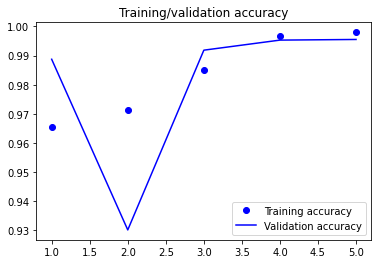

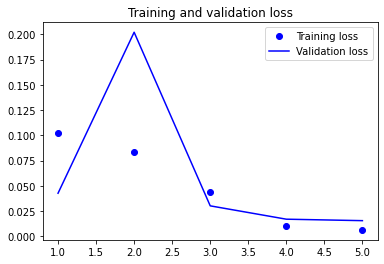

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training/validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate(X_test, y_test)

281/281 [==============================] - 24s 84ms/step - loss: 0.0154 - acc: 0.9955


[0.015434718690812588, 0.9955456852912903]

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred >=0.5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4284
           1       1.00      1.00      1.00      4696

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

